<a href="https://colab.research.google.com/github/FrancescoZanni/MLPNS_FZanni/blob/main/MLPNS_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lezione 4
Regole per la riproducibilita: 
- I dati devono essere accessibili a tutti, vanno shareati per es su github
- Setto sempre il seed a un qualche numero, così se lo faccio girare di nuovo ottengo la stessa cosa
- Prima di consegnare fare un restart and run all, così mi assicuro che funzioni con la sequenza di celle corretta 

Regole di igiene del codice: 
- Axis labels
- Caption: spiega tutto quello che c'è nel plot (tipo legenda) dice cosa c'è di interessante nel plot
- Evitare i numeri "volanti", se stampo un numero stampo anche che cosa è e cosa significa

- Importare sempre tutto quello che serve all'inizio del codice

##Primo argomento Probabilità e statistica

onlinestatbook.com

### Probabilità
 Due interpretazioni: di solito concetto frequentista, ma in molti dei modelli e dei pacchetti che useremo aderiscono all'interpretazione Bayesiana

 - Frequentista: probabilità = frequenza (soggetto a deviazioni)(non prendo il limite?) 
 - Bayesiana: introduco un prior (conoscenza a priori) che arricchisce la mia interpretazione della frequenza (se io sono a casa e ho uan moenta e voglio predire la probabilità di testa o croce già parto pensando che sarà il 50% se è uno per strada penso che la moneta possa essere truccata).

 Dal punto di vista frequentista penso che ripetendo un esperimento più volte avrò una corrispondenza più accurata tra frequenza e probabilità ( legge dei grandi numeri) 


Vedi slide con gli operatori e l'aritmetica: 
https://slides.com/federicabianco/mlpns23_2


 ### Statistica

 la statistica si basa sulla teoria della probabilità ed è alla base dell'analisi.
 Ci porta dall'osservazione di un sample a fare inferenze su tutta la popolazione 

 #### Distribuzione:
 formula, modello 
 #### Popolazione: 
 tutti gli elementi 
 #### Sample:
  subset limitato della popolazione, quello su cui di solito osservo


### Momenti della distribuzione

Primo momento: media (aritmetica)
non è la moda (picco)
non è la mediana (mezza distribuzione a destra e mezza a sinistra)

Nel codice: 
np.mean(array) come funzione, oppure 
.mean()
.mean(axis=1) specifico l'asse rispetto al quale faccio la media 

np.median(array) funzione, non faccio array.median()


Secondo momento: varianza

Nel codice stessa cosa 
.std()
.std(axis=1)

Numeri da ricordare: distribuzione Gaussiana 68%, 95%, 99.7%
Li usiamo come threshold per dire se rigetto oppure no la mia teoria
La scelta su quanti sigma scelgo dipende dal campo di ricerca, in fisica di solito 3 e in particle physics spesso 5

Nelle scenze sociali spesso si tiene anche il 2 sigma, perchè i comportamenti umani sono stocastici

Interquantile range: guarda alla percentuale di valori all'interno di una certa area (solo le la distr è gaussiana o simmetrica ha una relazione stretta con la sigma )

### Distribuzione binomiale 
 Distribuzione che descrive il risutlato per una collezione di esperimenti, ciascuno con gli stessi outcome con probabilità di ciascun outcome costante (coin toss, truccata oppure no)
 
- Supporto positivo
- PMS è la distribuzione, densità di probabilità 
- Skewness momento terzo, se è simmetrica oppure no 
- Kurtosi quanto sono pesanti le code

### Distr. Poisson 
Descrive la varianza su un natural statistic process: es. flusso di una stella per una quantità di tempo limitata (numero di fotoni) 
Per stocasticità della natura se è un evento steady in realtà ha una varianza e segue una distr poisson 

Es se misuro 100 fotoni mi aspetto che il valore vero stia in $100\pm \sqrt{100}$

Un solo parametro: $\lambda$

### Gaussiana 
- Supporto infinito 
- Simmetrica 
- "Continua"

Motivo per cui è simmetrica: la PDF è pari rispetto alla media 

Anche se quasi niente in natura è gaussiano quasi tutte le analisi statistiche assumono distr Gaussiane (limite centrale?)
Spesso i risultati della ricerca sono corretti solo sotto l'assunzione di Gaussianità, si spera che l'approsismazione sia abbastanza buona 


 




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://bit.ly/videosfile"

In [ ]:
videos = pd.read_csv(url)

In [ ]:
videos.describe() #per le colonne numeriche fa una prima analisi delle proprietà statistiche, è comunque un dataframe, posso usarlo come metodo veloce per estrarre le colonne numeriche

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [ ]:
ncols=(videos.describe()).columns

In [ ]:
print(videos["views"].mean())
print(videos["views"].std())

2360784.6382573447
7394113.75970394


In [ ]:
videos[ncols].std()

category_id      7.568327e+00
views            7.394114e+06
likes            2.288853e+05
dislikes         2.902971e+04
comment_count    3.743049e+04
dtype: float64

In [ ]:
videos_array = videos[ncols].values #lo rendo un array, non più un dataframe 

In [ ]:
videos_array.mean(axis=1)

array([ 164968.6,  506968.2,  670202. , ...,  223913.4, 1173941. ,
       2204197.8])

In [ ]:
videos.corr()

,category_id,views,likes,dislikes,comment_count
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307
views,-0.168231,1.000000,0.849177,0.472213,0.617621
likes,-0.173921,0.849177,1.000000,0.447186,0.803057
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000


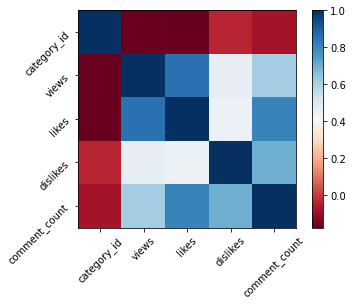

In [ ]:
plt.imshow(videos[ncols].corr(), clim=(-1,1));   #specifico il range di colori
plt.imshow(videos[ncols].corr(), cmap="RdBu");

plt.colorbar();
plt.xticks([0,1,2,3,4], videos[ncols].columns,rotation = 45);
plt.yticks([0,1,2,3,4], videos[ncols].columns,rotation = 45);


#Volendo sistemare per eliminare la colonna dell category ID tanto non serve a nulla



#Lezione 5